<a href="https://colab.research.google.com/github/AndyLightning/SZL-Work/blob/2/CVS_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision Systems Homework**

Hi all!

In the spirit of #StayAtHome I tried to assemble a homework project without leaving the house. So, if this looks a little DIY, that's why. So without further ado:

## **Welcome to Cactusville!**

Cactusville is a small town populated by - you guessed correcty - cacti. Since it is a rapidly developing village, they are considering to use self-driving vehicles in their hometown. Your job as a computer vision maestro is to develop the required detection methods.

## The setting

Cactusville is quite unique in the sense that the entire surface of the town is covered in blue tablecloth. The exact colour and pattern of the cloth may vary slightly.

By-and large there are 3 different objects of interest:

* **Cacti:** These are the inhabitants of the village, so self-driving cars must be able to detect them to avoid hitting a cactus. Cacti have four basic sub-types: ***Happy***, ***Sad***, ***Angry*** and ***Evil***
* **Vehicles:** These are other vechiles you should also avoid colliding with. There are 3 vehicles in Cactusville: An ***SUV***, a ***truck***, and an ***airplane***.
* **Traffic Signs:** There are several signs placed all around the town, often multiple ones on a single stand. There are 55 different traffic sign classes, which are not listed here for the sake of brevity.

## Tasks

The people of Cactusville provided 4 videos for you to develop your algorithms with. Each video consists of several RGB and corresponding depth frames, which are found in the '*rgb*' and '*depth*' subfolders of the video. They are ordered numerically. The depth image is a single-channel, 16-bit image, where the pixel value is the distance of that pixel from the camera in **mm**.

The videos also contain a **calibration.yaml** file, which contains the intrinsic parameters of the camera. These are the same for all videos used, so feel free to hardcode the important values into your program.

Your team has to complete the following tasks:

1.   **Traditional Vision:** Create an algorithm to accurately detect and classify the 3 objects of interest (Cactus, Vehicle, Traffic Sign). You don't have to determine the subclass at this point.
2.   **Deep Learning:** Use a deep learning algorithm to classify traffic signs. The package provided includes a training and validation database of 32x32 RGB images.
3.   **3D Vision:** Determine the 3D positions of the object of interest relative to the camera. Use the center of an object's bounding box to determine the position on the image.

## Hardcore Tasks

There are also 3 hardcore tasks for those who like challenges. These aren't particularly difficult, but they take more work and require you to go a little bit beyond the scope of the practicals.

1.   **Traditional Vision:** Determine the subclasses of Cacti and Vehicles
2.   **Deep Learning:** Of the 55 possible traffic signs, 3 are missing from the training and test datasets. ('*X - Priority*', '*X - Turn left*', '*X - Turn right*') As a result, the neural net trained in task 2 will not be able to classify them properly. Extend your neural network to classify these as well.
3.   **3D Vision:** Determine the absolute pose (4x4 transformation matrix) of the camera as it moves throughout the video. You can safely assume that the pose in the first frame of every video is the identity matrix.

## Evaluation and Score

The basic package also contains annotations (correct answers) in the file **annotations.pickle** and a small python script **evaluate.py** you can use to measure the performance of your algorithm. 

Your homework score will be computed using the same script, albeit on 2 secret videos that you were not provided. The reason for this is to make sure that your algorithm works in new situations as well. The secret videos use the same 2 tablecloths and 3 vehicles, but the traffic signs and the cacti may be different. Not to mention the illumination.

The tasks will be evaluated using the following metrics:

* Task 1 - **Average Precision** (AP): This metric is simply the average of **Recall** (nCorrect / nObject) and **Precision** (nCorrect / nPrediction).
* Tasks 1 HC, 2 and 2 HC - **Classification accuracy**
* Tasks 3 and 3 HC - **RBF error**: This is simple the squared error between the prediction and the correct answer transformed by an RBF (Radial Basis Function) kernel. This means that a perfect answer has a score of 1, a bad answer will result in a score close to 0.

### **Answer format**

The evaluation function takes a single argument: A dictionary that containes your predictions. On the top level this dictionary should look like this:

```python
myAnswers = {
    'video1/rgb/1.jpg' : <<Predictions for the image>>,
    'video1/rgb/2.jpg' : <<Predictions for the image>>,
    ...
    'video4/rgb/10.jpg' : <<Predictions for the image>>,
}
```
It is important that the dictionary key contains the video path, since two videos might have image files with the same name. Also, include all images from all videos in the file (even if you have no predictions), since the evaluation function will look for them! The order of the images does not matter.

A prediction for a single image should also be a dictionary with the following format:
```python
myPred = {
    'poses' : [t_11, t12_, t_13, t_14, ..., t_33, t_34],
    'objects' : [obj_1, obj_2, ... obj_n]
}
```
The key `poses` contains the first three rows of the transformation matrix (the fourth row is always `[0 0 0 1]`). The key `objects` is a list, each element containing a single object prediction. The order of predictions does not matter. A single object prediction is also a list, containing the following elements:
```python
myObjects = [u, v, w, h, classInd, subClassInd, x, y, z]
```

* `(u, v)` are the center coordinates of the object's bounding box, while `(w, h)` are the width and height parameters. All four are expected in pixels @640x480 resolution.
* `(x, y, z)` are the 3D coordinates of the object relative to the camera. They are expected in **meters**.
* `classInd` is the index of the object class in the list `className` (see below). It is between 0 and 2.
* `subClassInd` is the index of the subclass in the appropriate list in `subclassNames` (again, see below). It is between [0-54] for traffic signs, [0-2] for vehicles and [0-3] for cacti.

## Rules

Here are some important rules and guidelines you have to follow:

*   This work is to be done in groups of 3 or 4 people. You can do it with less if you feel confident, but not more.
*   Forming/finding a group is your job. Once you have one, 1 person from the group shold write me a message on teams with the names and neptun codes of the members.
*   If you can't find a group by Sunday, write me and I'll formulate groups with the remaining people.
*   The deadline for the submission is Friday midnight on the 14th week. You can make a late submission until the next Sunday midnight.
*   You can opt out of the homework. In this case you will beed to take the midterm exam. This will be done via teams video chat (oral exam). If you want to take this option, write me a message by Sunday.
*   To pass the homework, you will have to submit a working solution for the 3 basic tasks. The quality of your predictions has to be significantly better than what is achievable by random guessing.

### Offered final grade

To qualify for the offered final grade (and to skip the exams), you have to complete at least one of the hardcore tasks. What this final grade will be depends on the quality of the predictions. 

I cannot specify the criteria exactly at this time, since I don't know how easy/hard this homework is yet. I will, however adhere to the following guidelines:

*   I'm planning to offer Good (4) and Excellent (5) final grades.
*   Those, who completed all 3 hardcore tasks with high quality are gonna get a 5
*   Those, who completed at least 2 hardcore tasks with high quality are gonna get **at least** a 4
*   'High quality' is undefined to create a situation in which teams compete
*   Also, I want to avoid two situations: a., where the criterion is so hard that only a few people manage to get an offered grade; and b., where it is so easy that everyone gets one.
*   My goal is that about 40-50% of all students would get an offered grade, 15-20% getting 5, and 25-30% getting 4. These goals are might change if way more people opt out of homework than I expect.

### Ethics

Copying entire solutions from online sources or each other is plagiarism, and it will be checked using automated tools. There are things that are perfectly okay, such as:
*   Copying small snippets (a few lines) from the OpenCV/PyTorch tutorials or stackoverflow, etc.
*   Appropriating code from the practicals (you can copy the entire thing), especially the deep learning one.
*   Since what is okay and what isn't is a bit subjective, if you are unsure, ask me.

## So, how should we do this?

So, how can you do this homework, especially if you haven't done things like this before? Here are a few tips:

### Environment

For development IDE the easiest is to just use Google Colab. To do this you just have to solve the homework inside this notebook. This is the simplest solution, although it has one drawback: the colab notebook has limited debugging capabilities.

If you want something more powerful, I recommend the [PyCharm](https://www.jetbrains.com/pycharm/) IDE, which is a free and pretty powerful Python development tool.

If you are planning to use PyCharm on Windows, you need to install a Python distribution, since Windows still doesn't come with one (it's 20 effing 20, Microsoft!). I recommend [Anaconda](https://www.anaconda.com/distribution/). Make sure you use Python 3.x and not 2.7.

[Here's a tutorial on how to set it up.](https://www.youtube.com/watch?v=e53lRPmWrMI)

### Collaboration within the team

Since I would strongly discourage teams to collaborate physically in the current situation, I would recommend some methods for remote collaboration.

* First of all, use Teams or similar methods to communicate.
* Second, use git or a similar version control tool to handle multiple team members working on the same project. 
* I strongly recommend creating a private repository for your homework on [Github](https://github.com/) (since you can add exactly 3 collaborators - including you that's a 4 person team). There, you can also create issues and other nice-to-have features to track you development. Getting some experience with version control is an absolute must for any engineer anyways.

Here's a tutorial for git for those who never used something like this before.

To use git from a GUI, I recommend [SmartGit](https://www.syntevo.com/smartgit/) or [Git Extensions](http://gitextensions.github.io/).

**ProTip:** If you use a Colab notebook, make sure to clear the output cells (especially figures and images) before you commit. Otherwise you'll litter in your repository.

[Here is an introduction to git](https://www.freecodecamp.org/news/learn-the-basics-of-git-in-under-10-minutes-da548267cc91/)

### Making a submission

You can make a submission at the appropriate page in the edu portal. The results and leaderboard will also be published here. The results are evaluated around 8pm (CET), so it's pointless to make multiple submission per day.

**Note**: Your submission should be runnable from Colab or PyCharm (if you used any custom libraries, please note it), and it must include the trained neural network model file from task 2. Also, make sure that only the code required for evaluation is ran (you can use a control variable to skip training code).

### Further resources

[Python tutorials](https://docs.python.org/3/tutorial/)

[OpenCV tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)

[PyTorch tutorials](https://pytorch.org/tutorials/)




# Solution
## Download dataset

In [2]:
# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

#Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip

# Templates
!wget https://github.com/AndyLightning/SZL-Work/raw/master/Faces.zip
!unzip -qq Faces.zip
!rm Faces.zip


--2020-05-02 08:40:04--  http://deeplearning.iit.bme.hu/CVS/HW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14450183 (14M) [application/zip]
Saving to: ‘HW.zip’

HW.zip              100%[===================>]  13.78M  3.36MB/s    in 4.1s    

2020-05-02 08:40:10 (3.36 MB/s) - ‘HW.zip’ saved [14450183/14450183]

replace HW/annotations.pickle? [y]es, [n]o, [A]ll, [N]one, [r]ename: --2020-05-02 08:40:20--  http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175675617 (168M) [application/zip]
Saving to: ‘trafficSignsHW.zip’

trafficSignsHW.zip   17%[==>                 ]  29.4

## Folder example

Get all subfolders in a directory

```
import os
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]
```

Get all files with extension in a directory

```
import glob
import re

def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)

names = sorted_nicely(glob.glob1(path, "*.extension"))
```

### Class names


In [0]:
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

### Display the first images

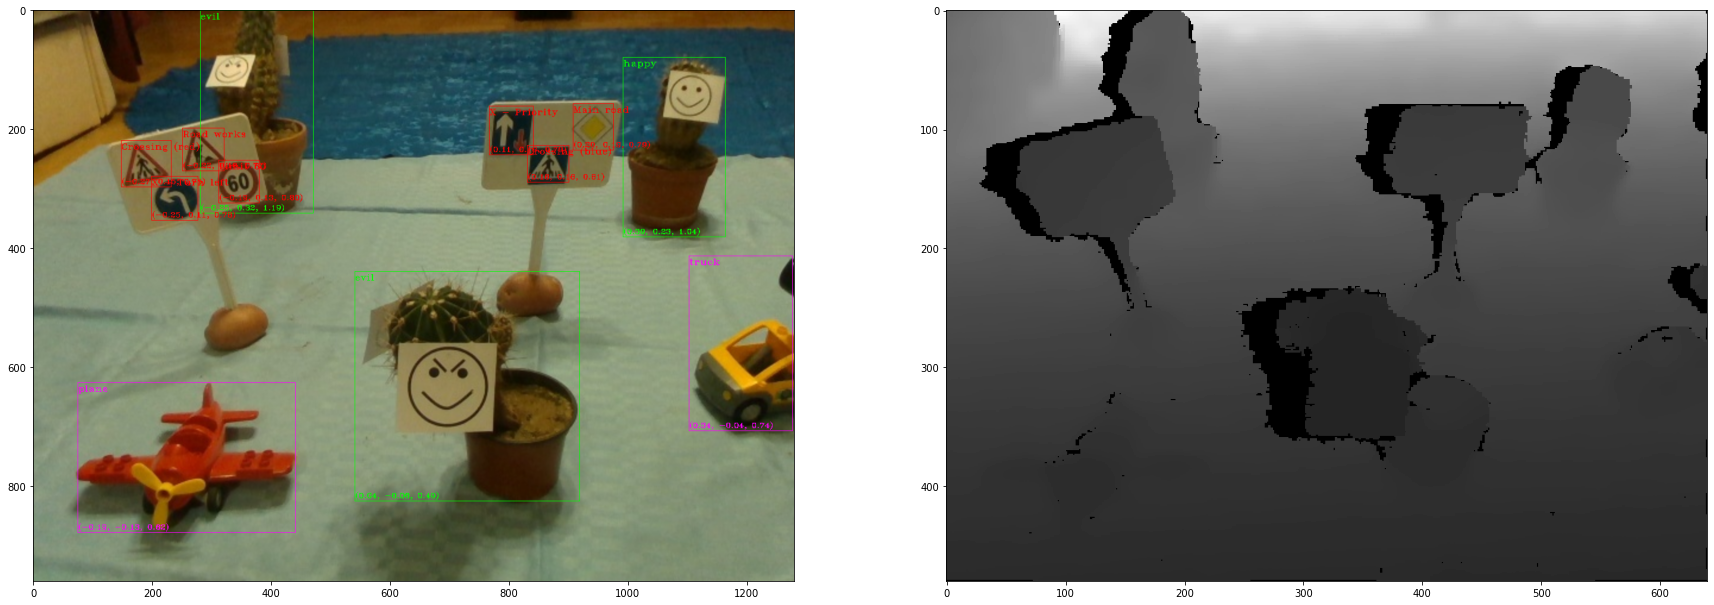

In [4]:

colors = [(0,0,255),(255,0,255),(0,255,0)]

def drawBBs(BBs, img):
    img = cv2.resize(img, (1280, 960))
    for BB in BBs:
        u = BB[0]*2
        v = BB[1]*2
        w = BB[2]*2
        h = BB[3]*2
        c = BB[4]
        sc = BB[5]
        x = BB[6]
        y = BB[7]
        z = BB[8]
        s = (max(0,u - w // 2),max(0,v - h // 2))
        e = (u + w // 2,v + h // 2)
        cv2.rectangle(img, s, e, colors[c], 1)
        tl = (s[0], s[1]+15)
        bl = (s[0], e[1]-5)
        cv2.putText(img,subclassNames[c][sc],tl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,colors[c])
        coords = "(%.2f, %.2f, %.2f)" % (x,y,z)
        cv2.putText(img,coords,bl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.65,colors[c])
    
    return img

import pickle
import cv2
import matplotlib.pyplot as plt
#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

# Read images
img = cv2.imread("HW/g1/rgb/1.jpg")
depth = cv2.imread("HW/g1/depth/1.png", -1)

# Read annotations
file = open('HW/annotations.pickle','rb')
annotations = pickle.load(file)

# Visualization
depth = depth / 5000.0
img = drawBBs(annotations["HW/g1/rgb/1.jpg"]["objects"], img)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Figure with subplots
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(depth,cmap='gray')

#Célmappák Beállításához

In [0]:
import glob
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

 
def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)


###Itt kéne állítani###
names1=sorted_nicely(glob.glob1('HW/g1/rgb/', "*.jpg"))
names2=sorted_nicely(glob.glob1('HW/g2/rgb/', "*.jpg"))
names3=sorted_nicely(glob.glob1('HW/g3/rgb/', "*.jpg"))
names4=sorted_nicely(glob.glob1('HW/g4/rgb/', "*.jpg"))

allNames=[]
allTruth=[]

###Itt###
cntr=0
for i in names1:
  allNames.append(names1[cntr])
  allTruth.append(cntr<3)
  cntr+=1
cntr=0
for i in names2:
  allNames.append(names2[cntr])
  allTruth.append(cntr<3)
  cntr+=1
cntr=0
for i in names3:
  allNames.append(names3[cntr])
  allTruth.append(cntr<3)
  cntr+=1
cntr=0
for i in names4:
  allNames.append(names4[cntr])
  allTruth.append(cntr<3)
  cntr+=1

###És itt###
allDestination=[]
for i in names1:
  allDestination.append("HW/g1/rgb/"+i)
for i in names2:
  allDestination.append("HW/g2/rgb/"+i)
for i in names3:
  allDestination.append("HW/g3/rgb/"+i)
for i in names4:
  allDestination.append("HW/g4/rgb/"+i)

#Andris Functions

In [0]:


###Descriptorok
path="myTemplates/{}/{}/"
def getDescC(clasS,subClass):

  img1s=[]
  img1s.append(cv2.cvtColor(cv2.imread(path.format(2,0)+"X.PNG"), cv2.COLOR_BGR2RGB))
  img1s.append(cv2.cvtColor(cv2.imread(path.format(2,1)+"X.PNG"), cv2.COLOR_BGR2RGB))
  img1s.append(cv2.cvtColor(cv2.imread(path.format(2,2)+"X.PNG"), cv2.COLOR_BGR2RGB))
  img1s.append(cv2.cvtColor(cv2.imread(path.format(2,3)+"X.PNG"), cv2.COLOR_BGR2RGB))
  gray1=[]
  cntr = 0
  for i in img1s:
    gray1.append(cv2.cvtColor(img1s[cntr], cv2.COLOR_BGR2RGB))
    cntr+=1
  detector=cv2.AKAZE_create()
  #Kulcspontok és descriptorok meghatározása
  kp1=[]
  desc1=[]
  cntr = 0
  for i in img1s:
    help1,help2 = detector.detectAndCompute(gray1[cntr], None)
    kp1.append(help1)
    desc1.append(help2)
    cntr+=1
  return kp1,desc1
def getDesc(clasS,subClass):
  imgNames = sorted_nicely(glob.glob1(path.format(clasS,subClass), "*.PNG"))
  img1s=[]
  for i in imgNames:
      img1s.append(cv2.cvtColor(cv2.imread(path.format(clasS,subClass)+i), cv2.COLOR_BGR2RGB))
  gray1=[]
  cntr = 0
  for i in imgNames:
    gray1.append(cv2.cvtColor(img1s[cntr], cv2.COLOR_BGR2RGB))
    cntr+=1
  can=[]
  cntr = 0
  for i in imgNames:
    can.append(cv2.Canny(gray1[cntr], 50,120))
    cntr+=1
  detector=cv2.AKAZE_create()
  #Kulcspontok és descriptorok meghatározása
  kp1=[]
  desc1=[]
  cntr = 0
  for i in imgNames:
    help1,help2 = detector.detectAndCompute(can[cntr], None)
    kp1.append(help1)
    desc1.append(help2)
    cntr+=1
  return kp1,desc1


kp00,desc00=getDesc(0,0)
kp10,desc10=getDesc(1,0)
kp11,desc11=getDesc(1,1)
kp12,desc12=getDesc(1,2)
kp20,desc20=getDesc(2,0)
kp21,desc21=getDesc(2,1)
kp22,desc22=getDesc(2,2)
kp23,desc23=getDesc(2,3)
kp24,desc24=getDesc(2,4)


#Kontúrokat keresek
def getArea(img):
  contours, hierarchy = cv2.findContours(solution2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  area=0
  for cnt in contours:
    area+=cv2.contourArea(cnt)
  return area

def MMaster(clasS, subClass, img2): #####Friss kommentek vannak a gyorsítás miatt!!!!
  u=0
  v=0
  w=0
  h=0
  found=False
  path="myTemplates/{}/{}/"
  imgNames = sorted_nicely(glob.glob1(path.format(clasS,subClass), "*.PNG"))
  img1s = []
  for i in imgNames:
    img1s.append(cv2.cvtColor(cv2.imread(path.format(clasS,subClass)+i), cv2.COLOR_BGR2RGB))

  gray1=[]
  cntr = 0
  #for i in imgNames:
    #gray1.append(cv2.cvtColor(img1s[cntr], cv2.COLOR_BGR2RGB))
    #cntr+=1
  gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  Canny2=cv2.Canny(gray2,50,120)
  """
  if(clasS==2):
    gray2=cv2.Canny(gray2,50,120)
    cntr = 0
    for i in imgNames:
      gray1[cntr]=cv2.Canny(gray1[cntr],50,120)
      cntr+=1
  """
  # ORB
  #detector = cv2.ORB_create(2000)
  detector=cv2.AKAZE_create()
  #Kulcspontok és descriptorok meghatározása
  kp1=[]
  desc1=[]
  if (clasS==0):
    kp1=kp00
    desc1=desc00
  elif (clasS==1):
    if(subClass==0):
      kp1=kp10
      desc1=desc10
    if(subClass==1):
      kp1=kp11
      desc1=desc11
    if(subClass==2):
      kp1=kp12
      desc1=desc12
  elif (clasS==2):
    kp1=kp20
    desc1=desc20
  
  kp2, desc2 = detector.detectAndCompute(Canny2, None)

  MIN_MATCH = 4 #minimum hány párosítás kell
  if clasS==2:
    MIN_MATCH=7
  #Flann
  FLANN_INDEX_LSH = 6

  #Szótár - kulcs alapú konténer
  index_params= dict(algorithm = FLANN_INDEX_LSH,
                    table_number = 6,
                    key_size = 12,
                    multi_probe_level = 1)
  search_params=dict(checks=32)
  matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE_HAMMING)

  # Találjuk meg a 2 legjobb párosítást minden matchre
  imgNames=[]
  imgNames = sorted_nicely(glob.glob1(path.format(clasS,subClass), "*.PNG"))
  matches=[]
  cntr = 0
  for i in imgNames:
    if(len(kp1[cntr])>=2 and len(kp2)>=2):
      matches.append(matcher.knnMatch(desc1[cntr], desc2, 2))
    else:
      imgNames.remove(i)
    cntr+=1
  #Paraméter a pontosságunkhoz
  if (len(matches)==0):
    return img2,False,0,0,0,0,0,0






  ratio = 0.75
  #Próbáld meg egy nagyon picit növelni, hátha.....



  #Nem stimmel:
  
  #Jó párosítások meghatározása
  pre_matches=[]
  cntr = 0
  for i in imgNames:
    pre_matches.append([m[0] for m in matches[cntr] \
                      if len(m) == 2 and m[0].distance < m[1].distance * ratio])
    cntr+=1

  good_matches=len(pre_matches[0])
  cntr=1
  index=0
  for i in imgNames[:-1]:
    if len(pre_matches[cntr]) > good_matches:
      good_matches=len(pre_matches[cntr])
      index=cntr
    cntr+=1
  good_matches = [m[0] for m in matches[index] \
                      if len(m) == 2 and m[0].distance < m[1].distance * ratio]
  #Hány jó párosítást találtunk az "összhalmazból"
  print('good matches:%d/%d' %(len(good_matches),len(matches[index])))

  #0 értékekkel teli listát ad vissza, ami olyan hosszú, mint ahány jó párosításunk van
  matchesMask = np.zeros(len(good_matches)).tolist()


  #Ha több jó párosításunk van, mint ahányat megadunk a MIN_Match-el
  if len(good_matches) > MIN_MATCH:
      #Forrás és célpontok meghatározása
      src_pts = np.float32([ kp1[index][m.queryIdx].pt for m in good_matches ])
      dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ])
      #Megadja a perspektíva transzformációt (mtrx), és egy maszkot, ami tartalmazza az "inlier" és "outlier" pontokat
      mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

      #Pontosság
      accuracy=float(mask.sum())*100 / mask.size
      print("accuracy: %d/%d(%.2f%%)"% (mask.sum(), mask.size, accuracy))
      #Ha a maszk elemeinek összege nagyobb MIN_MATCh-nél
      if mask.sum() > MIN_MATCH:
          found=True
          # Sormátrixot csinálunk
          matchesMask = mask.ravel().tolist()
          #Template képnek a magassága és szélessége
          h,w, = img1s[index].shape[:2]
          #pts-nek megadjuk a template méret sarkait
          pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])
          #Célpont meghatározása
          dst = cv2.perspectiveTransform(pts,mtrx)
          u=(dst[0][0][0]+dst[1][0][0]+dst[2][0][0]+dst[3][0][0])/4
          v=(dst[0][0][1]+dst[1][0][1]+dst[2][0][1]+dst[3][0][1])/4
          w=((dst[3][0][0]-dst[0][0][0])+(dst[2][0][0]-dst[1][0][0]))/2
          h=((dst[2][0][1]-dst[3][0][1])+(dst[1][0][1]-dst[0][0][1]))/2
          #Kirajzoljuk a négyzetet körbe
          img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
          

  #Összehúzott kép
  res = cv2.drawMatches(img1s[index], kp1[index], img2, kp2, good_matches, None, \
                      matchesMask=matchesMask,
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
  return res, found, np.int32(u), np.int32(v), np.int32(w), np.int32(h), clasS, index ###Átírtam, itt eredetileg subClass volt!!!


def getContours(img,imgContour,minArea):
  contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cntr=0
  for cnt in contours:
    approx=[]
    area=cv2.contourArea(cnt)
    if area>minArea:
      cv2.drawContours(imgContour, contours, -1, (255,0,255),7) 
      peri=cv2.arcLength(cnt,True)
      approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
      x , y , w, h = cv2.boundingRect(approx)
      #cv2.rectangle(imgContour, (x , y ), (x + w , y + h ), (0, 255, 0), 5)
      cntr+=1
      #cv2.putText(imgContour, "Points: " + str(len(approx)), (x + w + 20, y + 20), cv2.FONT_HERSHEY_COMPLEX, .7,
       #                 (0, 255, 0), 2)
      #cv2.putText(imgContour, "Area: " + str(int(area)), (x + w + 20, y + 45), cv2.FONT_HERSHEY_COMPLEX, 0.7,
       #                 (0, 255, 0), 2)
  return cntr
def getZone(img,imgContour,minArea):
  contours,_ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  for cnt in contours:
    area=cv2.contourArea(cnt)
    if (area>minArea):
      cv2.drawContours(imgContour, contours, -1, (255,255,255),cv2.FILLED) 
      peri=cv2.arcLength(cnt,True)
      approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
      x , y , w, h = cv2.boundingRect(approx)
      print(area)
  return opened  
def getObjects(img,imgContour,minArea):
  blur = cv2.GaussianBlur(img, (5,5), 0)
  _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
  dilated = cv2.dilate(thresh, None, iterations=2)
  opened = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, np.ones((2,2))) #new
  #imgs_canny=cv2.Canny(np.copy(opened),50,120) #new
  #imgEro=cv2.erode(opened, kernel, iterations=1) #new
  contours, _ = cv2.findContours(opened, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  #contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cntr=0
  ret1=[]
  ret2=[]
  ret3=[]
  ret4=[]
  for cnt in contours:
    approx=[]
    area=cv2.contourArea(cnt)
    if (area>minArea and area <15000):
      cv2.drawContours(imgContour, contours, -1, (255,0,255),1) 
      peri=cv2.arcLength(cnt,False)
      approx = cv2.approxPolyDP(cnt, 0.02 * peri, False)
      x , y , w, h = cv2.boundingRect(approx)

      ret1.append(x)
      ret2.append(y)
      ret3.append(w)
      ret4.append(h)

      cv2.rectangle(imgContour, (x , y ), (x + w , y + h ), (0, 255, 0), 5)

      cntr+=1
  return ret1,ret2,ret3,ret4,(cntr-1)
def isSomething(clas,subC,img):
  bol=False
  bad1=bad2=bad3=False
  redParam=np.int32(0)
  blackParam=np.int32(0)
  area=np.int32(0)
  img2=np.copy(img)
  img3=np.copy(img)
  imgcr=np.copy(img)
  imgcrit1=np.copy(img)
  imgcrit2=np.copy(img)
  dilation1=0
  dilation2=0
  if(clas==1 and subC==0):
    mask1=cv2.inRange(img2,np.array([60, 10, 0]), np.array([160, 30, 30]))
    mask2=cv2.inRange(img2,np.array([0, 0, 0]), np.array([30, 30, 30]))
    mask3=cv2.inRange(img2,np.array([160, 15, 0]), np.array([255, 65, 40]))#Too Bright
  if(clas==1 and subC==2):
    mask1=cv2.inRange(img2,np.array([100, 15, 0]), np.array([200, 65, 40])) #120 15
    mask2=cv2.inRange(img2,np.array([0, 0, 0]), np.array([0, 0, 0]))
  masksum=mask1+mask2
  img3[masksum != [255]]=[0,0,0]
  ###Kritériumterületeseknek:
  if(clas==1 and subC==0):
    imgcr[mask3 != [255]]=[0,0,0]
    imgcr=cv2.morphologyEx(imgcr, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    imgs_canny=cv2.Canny(imgcr,50,120)
    dilationcr=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
    (contours,hierarchy)=cv2.findContours(dilationcr,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
      area=cv2.contourArea(contour)
      if(area>3000):
        bad3=True
        print("bad3-al van a baj")
    imgcrit1[mask1 != [255]]=[0,0,0]
    imgcrit1=cv2.morphologyEx(imgcrit1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    imgs_canny=cv2.Canny(imgcrit1,50,120)
    dilation1=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
    (contours,hierarchy)=cv2.findContours(dilation1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    isZero=0
    for pic, contour in enumerate(contours):
      isZero+=1
      area=cv2.contourArea(contour)
      redParam=area
      if(area<2700):
        bad1=True
      else:
        bad1=False
        break
        print("Piros area kisebb 2700-mál")
    if (isZero==0):
      bad1=True
      print("Nincs piros kontúr")
    imgcrit2[mask2 != [255]]=[0,0,0]
    imgcrit2=cv2.morphologyEx(imgcrit2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)))
    imgs_canny=cv2.Canny(imgcrit2,50,120)
    dilation2=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
    x2=dilation2
    contours=0
    (contours,hierarchy)=cv2.findContours(dilation2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    isZero=0
    for pic, contour in enumerate(contours):
      isZero+=1
      area=cv2.contourArea(contour)
      blackParam=area
      if(area<100):
        bad2=True
      else:
        bad2=False
        break
        print("Fekete area kisebb 100-mál")
    if (isZero==0):
      bad2=True
      print("Nincs fekete kontúr")
  img3=cv2.morphologyEx(img3, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
  imgs_canny=cv2.Canny(img3,50,120)
  dilation=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
  contours=0
  (contours,hierarchy)=cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  big=0
  x=y=w=h=0
  for pic, contour in enumerate(contours):
    peri=cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
    x , y , w, h = cv2.boundingRect(approx)
    print("Nézzük:")
    if (w>(h*5) or h>(w*3)):
      continue
    print("Méret OK")
    if (bad1 or bad2 or bad3): ###Nem teljesült a kritériumkövetelmény
      print("valami bad")
      continue
    print("Színmennyiség OK")
    area=cv2.contourArea(contour)
    if(area>3000):
      if(big<area):
        big=area
      bol=True

  return bol, dilation, big, np.int(x+w/2),np.int(y+h/2),np.int(w),np.int(h),dilation1,dilation2,redParam

def isSUV(clas,subC,img):
  bol=False
  redParam=0
  blackParam=0
  area=0
  big=0
  m1=0
  m2=0
  m3=0
  m4=0
  p1=[]
  p2=[]
  p3=[]
  p4=[]
  img1=np.copy(img)
  img2=np.copy(img)
  img3=np.copy(img)
  imgcr=np.copy(img)
  imgcrit1=np.copy(img)
  imgcrit2=np.copy(img)
  dilation1=0
  dilation2=0
  if(clas==1 and subC==0):
    mask3=cv2.inRange(np.copy(img2),np.array([200, 15, 0]), np.array([255, 65, 40]))#Too Bright mask3=cv2.inRange(np.copy(img2),np.array([140, 15, 0]), np.array([255, 65, 40]))
  if(clas==1 and subC==2):
    mask1=cv2.inRange(img2,np.array([100, 15, 0]), np.array([200, 65, 40])) #120 15
    mask2=cv2.inRange(img2,np.array([0, 0, 0]), np.array([0, 0, 0]))
  #masksum=mask1+mask2
  #img3[masksum != [255]]=[0,0,0]
  ###Kritériumterületeseknek:
  if(clas==1 and subC==0):
    #Pirosság
    imgcrit1=np.copy(img1)
    imafterKill=np.copy(img1)
    mask1=cv2.inRange(imgcrit1,np.array([85, 4, 0]), np.array([200, 50, 30])) #mask1=cv2.inRange(imgcrit1,np.array([75, 10, 10]), np.array([200, 50, 30]))
    imgcrit1[mask1 != [255]]=[0,0,0]
    imgcrit1=cv2.morphologyEx(imgcrit1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    imgs_canny=cv2.Canny(imgcrit1,50,120)
    dilation1=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
    contours=[]
    (contours,hierarchy)=cv2.findContours(dilation1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
      area=cv2.contourArea(contour)
      redParam=area
      #print("redParam: ", redParam)
      if(area>3000):
        peri=cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        x , y , w, h = cv2.boundingRect(approx)
        p1.append(x)
        p2.append(y)
        p3.append(x+w)
        p4.append(y+h)
        cv2.rectangle(img2, (x , y ), (x + w , y + h ), (255, 255, 255), -1)
    img2=cv2.inRange(img2,np.array([250, 250, 250]), np.array([255, 255, 255]))
    img1[img2 != [255]]=[0,0,0]
    #Feketeség -> Lesz Fekete Masksum
    imgcrit2=np.copy(img1)
    mask21=cv2.inRange(np.copy(imgcrit2),np.array([0, 0, 0]), np.array([30, 30, 30]))
    mask22=cv2.inRange(np.copy(imgcrit2),np.array([30, 30, 30]), np.array([60, 60, 90]))
    mask23=cv2.inRange(np.copy(imgcrit2),np.array([60, 60, 60]), np.array([90, 60, 90]))
    mask24=cv2.inRange(np.copy(imgcrit2),np.array([90, 90, 90]), np.array([120, 120, 120]))
    masksum=mask21+mask22+mask23+mask24
    imgcrit2[masksum != [255]]=[0]
    imgcrit2=cv2.morphologyEx(imgcrit2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)))
    imgs_canny=cv2.Canny(imgcrit2,50,120)
    dilation2=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
    contours=[]
    (contours,hierarchy)=cv2.findContours(dilation2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
      area=cv2.contourArea(contour)
      blackParam=area
      if(area>1400):
        #print("blackParam: ", blackParam)
        peri=cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        x , y , w, h = cv2.boundingRect(approx)
        k1=x+w//2
        k2=y+h//2
        cntr=0
        for i in p1:
          if(p1[cntr] < k1 and k1< p3[cntr] and p2[cntr] < k2 and k2 < p4[cntr] and p2[cntr]!=0):
            cv2.rectangle(img, (p1[cntr]-20 , p2[cntr]-20), (p3[cntr]+20,p4[cntr]+20), (255, 255, 255), -1) #Itt
            m1=(p1[cntr]+p3[cntr])//2
            m2=(p2[cntr]+p4[cntr])//2
            m3=(p3[cntr]-p1[cntr])
            m4=(p4[cntr]-p2[cntr])
            bol=True
            break            
          cntr+=1
    return bol, img, big, m1,m2,m3,m4,img1,dilation1,dilation2,blackParam
def isTruck(clas,subC,img):
  bol=False
  redParam=0
  blackParam=0
  area=0
  big=0
  m1=0
  m2=0
  m3=0
  m4=0
  p1=[]
  p2=[]
  p3=[]
  p4=[]
  img1=np.copy(img)
  img2=np.copy(img)
  img3=np.copy(img)
  imgcr=np.copy(img)
  imgcrit1=np.copy(img)
  imgcrit2=np.copy(img)
  dilation1=0
  dilation2=0
  if(clas==1 and subC==1):
    #Sárgaság
    imgcrit1=np.copy(img1)
    imafterKill=np.copy(img1)
    mask1=cv2.inRange(imgcrit1,np.array([140, 80, 0]), np.array([255, 200, 25])) #mask1=cv2.inRange(imgcrit1,np.array([140, 80, 0]), np.array([255, 200, 30]))
    imgcrit1[mask1 != [255]]=[0,0,0]
    imgcrit1=cv2.morphologyEx(imgcrit1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    imgs_canny=cv2.Canny(imgcrit1,50,120)
    dilation1=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
    contours=[]
    (contours,hierarchy)=cv2.findContours(dilation1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
      area=cv2.contourArea(contour)
      if(area>5000):
        peri=cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        x , y , w, h = cv2.boundingRect(approx)
        p1.append(x)
        p2.append(y)
        p3.append(x+w)
        p4.append(y+h)
        cv2.rectangle(img2, (x , y -20), (x + w , y + h +20), (255, 255, 255), -1)
    #Sárgaság
    img2=cv2.inRange(img2,np.array([250, 250, 250]), np.array([255, 255, 255]))
    img1[img2 != [255]]=[0,0,0]
    imgcrit2=np.copy(img1)
    mask2=cv2.inRange(np.copy(imgcrit2),np.array([0, 0, 0]), np.array([30, 30, 30]))
    imgcrit2[mask2 != [255]]=[0]
    imgcrit2=cv2.morphologyEx(imgcrit2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)))
    imgs_canny=cv2.Canny(imgcrit2,50,120)
    dilation2=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
    contours=[]
    (contours,hierarchy)=cv2.findContours(dilation2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
      area=cv2.contourArea(contour)
      blackParam=area
      if(area>1000):
        peri=cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        x , y , w, h = cv2.boundingRect(approx)
        k1=x+w//2
        k2=y+h//2
        cntr=0
        for i in p1:
          if(p1[cntr] < k1 and k1< p3[cntr] and p2[cntr]-20 < k2 and k2 < (p4[cntr]+30) and p2[cntr]!=0 and k2>200):
            cv2.rectangle(img, (p1[cntr] -20, p2[cntr]-20), (p3[cntr]+20,p4[cntr]+20), (255, 255,255), -1) #Itt
            m1=(p1[cntr]+p3[cntr])//2
            m2=(p2[cntr]+p4[cntr])//2
            m3=(p3[cntr]-p1[cntr])
            m4=(p4[cntr]-p2[cntr])
            bol=True
            break            
          cntr+=1
    return bol, img, big, m1,m2,m3,m4,img1,dilation1,dilation2,blackParam


def isTable(clas,subC,img):
  bol=False
  newOpen=False
  redParam=0
  blackParam=0
  area=0
  big=0
  m1=[]
  m2=[]
  m3=[]
  m4=[]
  p1=[]
  p2=[]
  p3=[]
  p4=[]
  img1=np.copy(img)
  img2=np.copy(img)
  img3=np.copy(img)
  imgcr=np.copy(img)
  imgcrit1=np.copy(img)
  imgcrit2=np.copy(img)
  dilation1=0
  dilation2=0
  if(clas==0):
    #White Everywhere
    imgcrit1=np.copy(img1)
    imafterKill=np.copy(img1)
    mask1=cv2.inRange(imgcrit1,np.array([115, 100, 60]), np.array([160, 145, 140])) #mask1=cv2.inRange(imgcrit1,np.array([115, 100, 60]), np.array([200, 215, 215]))
    imgcrit1[mask1 != [255]]=[0,0,0]
    imgcrit1=cv2.morphologyEx(imgcrit1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(14,14)))
    imgs_canny=cv2.Canny(imgcrit1,50,120)
    dilation1=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
    contours=[]
    (contours,hierarchy)=cv2.findContours(dilation1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
      area=cv2.contourArea(contour)
      if(area>3000):
        print(area)
        peri=cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        x , y , w, h = cv2.boundingRect(approx)
        p1.append(x)
        p2.append(y)
        p3.append(x+w)
        p4.append(y+h)
        cv2.rectangle(img2, (x , y), (x + w , y + h), (255, 255, 255), -1)
    #Keressünk táblákat
    img2=cv2.inRange(img2,np.array([250, 250, 250]), np.array([255, 255, 255])) 
    img1[img2 != [255]]=[0,0,0]
    imgcrit2=np.copy(img1)
    img3=np.copy(img1)
    mask21=cv2.inRange(np.copy(imgcrit2),np.array([100, 20, 30]), np.array([200, 70, 50]))
    mask22=cv2.inRange(np.copy(imgcrit2),np.array([0, 40, 10]), np.array([30, 90, 40]))
    mask23=cv2.inRange(np.copy(imgcrit2),np.array([120, 100, 0]), np.array([200, 160, 20]))
    masksum=[mask21,mask22,mask23]
    cntrj=1
    for j in masksum:
      imgcrit2=np.copy(img3)
      imgcrit2[j != [255]]=[0]
      imgcrit2=cv2.morphologyEx(imgcrit2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
      imgs_canny=cv2.Canny(imgcrit2,50,120)
      dilation2=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
      contours=[]
      (contours,hierarchy)=cv2.findContours(dilation2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
      for pic, contour in enumerate(contours):
        area=cv2.contourArea(contour)
        blackParam=area
        if(area>800 and area<3500):
          print("Area OK")
          peri=cv2.arcLength(contour,True)
          approx = cv2.approxPolyDP(contour, 0.1 * peri, True) ###Ezt átírtam 0.02-ről!!!
          x , y , w, h = cv2.boundingRect(approx)
          k1=x+w//2
          k2=y+h//2
          cntr=0
          for i in p1:
            if(p1[cntr] < k1 and k1< p3[cntr] and p2[cntr] < k2 and k2 < (p4[cntr]) and p2[cntr]!=0):
              cv2.rectangle(img1, (x,y), (x+w//2,y+h//2), (0, 255, 255), 5)
              m1.append((p1[cntr]+p3[cntr])//2)
              m2.append((p2[cntr]+p4[cntr])//2)
              m3.append(p3[cntr]-p1[cntr])
              m4.append(p4[cntr]-p2[cntr])
              bol=True            
            cntr+=1
    return bol, img, big, m1,m2,m3,m4,img1,dilation1,dilation2,blackParam

def isReallyCactus(x,y,r,img):
  bol=False
  redParam=0
  blackParam=0
  area=0
  big=0
  m1=x
  m2=y
  m3=2*r
  m4=2*r
  p1=0
  p2=0
  p3=0
  p4=0
  img1=np.copy(img)
  img2=np.copy(img)
  img3=np.copy(img)
  imgcr=np.copy(img)
  imgcrit1=np.copy(img)
  imgcrit2=np.copy(img)
  dilation1=0
  dilation2=0
  #Valami zöldes trutymó
  imgcrit1=np.copy(img1)
  cv2.rectangle(imgcrit1, (x-60 , y-60), (x + 60 , y + 60), (255, 255, 255), -1)
  imgcrit1=cv2.inRange(imgcrit1,np.array([250,250,250]), np.array([255,255,255]))
  img3[imgcrit1==[0]]=[0,0,0]
  mask1=cv2.inRange(img3,np.array([20, 20, 0]), np.array([70, 70, 30])) #mask1=cv2.inRange(imgcrit1,np.array([140, 80, 0]), np.array([255, 200, 30]))
  imgcrit2[mask1 != [255]]=[0,0,0]
  imgcrit2=cv2.morphologyEx(imgcrit2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
  imgs_canny=cv2.Canny(imgcrit2,50,120)
  dilation1=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
  contours=[]
  (contours,hierarchy)=cv2.findContours(dilation1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  for pic, contour in enumerate(contours):
    area=cv2.contourArea(contour)
    if(area>800): #800-al egész jó volt
      #print(area)
      peri=cv2.arcLength(contour,True)
      approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
      x , y , w, h = cv2.boundingRect(approx)
      p1=min(x,m1-m3//2)
      p2=min(y,m2-m4//2)
      p3=max(x+w,m1+m3//2)
      p4=max(y+h+20,m2+20+m4//2)
      cv2.rectangle(img, (p1-10, p2-30), (p3+10 , p4+20), (255, 255, 255), -1) #Itt
      bol=True
  return bol, img, big, (p1+p3)//2,(p2+p4)//2,(p3-p1),(p4-p2),img1,dilation1,imgcrit1,blackParam


def isRepzi(clas,subC,img):
  bol=False
  redParam=0
  blackParam=0
  area=0
  big=0
  m1=0
  m2=0
  m3=0
  m4=0
  p1=[]
  p2=[]
  p3=[]
  p4=[]
  img1=np.copy(img)
  img2=np.copy(img)
  img3=np.copy(img)
  imgcr=np.copy(img)
  imgcrit1=np.copy(img)
  imgcrit2=np.copy(img)
  dilation1=0
  dilation2=0
  if(clas==1 and subC==2):
    mask1=cv2.inRange(img2,np.array([100, 15, 0]), np.array([200, 65, 40])) #120 15
    mask2=cv2.inRange(img2,np.array([170, 70, 0]), np.array([200, 140, 50]))
    imgcrit1=np.copy(img1)
    imgcrit1[mask1 != [255]]=[0,0,0]
    imgcrit1=cv2.morphologyEx(imgcrit1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)))
    imgs_canny=cv2.Canny(imgcrit1,50,120)
    dilation1=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
    contours=[]
    (contours,hierarchy)=cv2.findContours(dilation1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
      area=cv2.contourArea(contour)
      redParam=area
      if(area>3000):
        peri=cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        x , y , w, h = cv2.boundingRect(approx)
        p1.append(x)
        p2.append(y)
        p3.append(x+w)
        p4.append(y+h)
        cv2.rectangle(img2, (x , y ), (x + w , y + h ), (255, 255, 255), -1)
    img2=cv2.inRange(img2,np.array([250, 250, 250]), np.array([255, 255, 255]))
    img1[img2 != [255]]=[0,0,0]
    imgcrit2=np.copy(img1)
    imgcrit2[mask2 != [255]]=[0]
    imgcrit2=cv2.morphologyEx(imgcrit2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)))
    imgs_canny=cv2.Canny(imgcrit2,50,120)
    dilation2=cv2.dilate(imgs_canny,kernel_dil,iterations=1)
    contours=[]
    (contours,hierarchy)=cv2.findContours(dilation2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for pic, contour in enumerate(contours):
      area=cv2.contourArea(contour)
      blackParam=area
      if(area>400 and area<3000):
        peri=cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        x , y , w, h = cv2.boundingRect(approx)
        k1=x+w//2
        k2=y+h//2
        cntr=0
        for i in p1:
          if(p1[cntr] < k1 and k1< p3[cntr] and p2[cntr] < k2 and k2 < p4[cntr] and p2[cntr]!=0):
            cv2.rectangle(img, (p1[cntr] , p2[cntr]), (p3[cntr],p4[cntr]), (255, 255, 255), -1) #Itt
            m1=(p1[cntr]+p3[cntr])//2
            m2=(p2[cntr]+p4[cntr])//2
            m3=(p3[cntr]-p1[cntr])
            m4=(p4[cntr]-p2[cntr])
            bol=True
            break            
          cntr+=1
    return bol, img, big, m1,m2,m3,m4,img1,dilation1,dilation2,blackParam
def concentrate(num):
  if num<0:
    return 0
  if num>700:
    return 0
  return num
def redTable (img,obje):
  bol=True
  redParam=0
  blackParam=0
  area=0.0
  big=0
  m1=[]
  m2=[]
  m3=[]
  m4=[]
  p1=[]
  p2=[]
  p3=[]
  p4=[]
  ErrFent=[]
  ErrLent=[]
  ErrBal=[]
  ErrJobb=[]
  img1=np.copy(img)
  img2=np.copy(img)
  img3=np.copy(img)
  img4=np.copy(img)
  imgGray=np.copy(img)
  imgGray=cv2.cvtColor(imgGray,cv2.COLOR_RGB2GRAY)
  imgcr=np.copy(img)
  imgcrit1=np.copy(img)
  imgcrit2=np.copy(img)
  dilation1=0
  dilation2=0
  Fekete=[]
  c=0
  d=0
  while(c<480):
    sor=[]
    d=0
    while(d<640):
      sor.append(0)
      d+=1
    Fekete.append(sor)
    c+=1
  Fekete=np.copy(img)
  for i in obje:
    ErrFent.append(concentrate(i[1]-i[3]))
    ErrBal.append(concentrate(i[0]-i[2]))
    ErrLent.append(concentrate(i[1]+i[3]))
    ErrJobb.append(concentrate(i[0]+i[2]))
  mask1 = cv2.inRange(imgGray, np.array([0]), np.array([100]))
  imgcrit1=np.copy(img1)
  imgcrit1[mask1 != [255]]=[0,0,0]
  imgcrit1=cv2.morphologyEx(imgcrit1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)))
  imgs_canny=cv2.Canny(mask1,50,120)
  dilation1=cv2.dilate(imgs_canny,np.ones((5,5),np.uint8),iterations=1)
  dilation1=cv2.morphologyEx(dilation1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10)))
  dilation1=cv2.morphologyEx(dilation1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10)))
  contours=[]
  (contours,hierarchy)=cv2.findContours(dilation1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  for pic, contour in enumerate(contours):
    area=cv2.contourArea(contour)
    redParam=area
    if(800<area and area<5000):
      peri=cv2.arcLength(contour,True)
      approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
      x , y , w, h = cv2.boundingRect(approx)
      bol=True
      cntr=0
      if(bol and y>50):
        p1.append(x)
        p2.append(y)
        p3.append(x+w)
        p4.append(y+h)
        cv2.rectangle(img2, (x , y ), (x + w , y + h ), (255, 255, 255), -1)
        cv2.putText(img2,(str(area)), (x+5,y+15), cv2.FONT_HERSHEY_COMPLEX_SMALL,1.5,(255, 255, 255), 2)
  img2=cv2.inRange(img2, np.array([250,250,250]), np.array([255,255,255]))
  img3[img2 != [255]]=[0,0,0]
  imgGray=np.copy(img3)
  imgGray=cv2.cvtColor(imgGray,cv2.COLOR_RGB2GRAY)
  imgGray = cv2.inRange(imgGray, np.array([0]), np.array([60]))
  imgGray=cv2.morphologyEx(imgGray, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)))
  imgs_canny=cv2.Canny(imgGray,50,120)
  dilation1=cv2.dilate(imgs_canny,np.ones((3,3),np.uint8),iterations=1)
  contours=[]
  (contours,hierarchy)=cv2.findContours(dilation1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  for pic, contour in enumerate(contours):
    area=cv2.contourArea(contour)
    if(area>3000 and area<20000):
      peri=cv2.arcLength(contour,True)
      approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
      x , y , w, h = cv2.boundingRect(approx)
      cv2.rectangle(imgcr, (x , y ), (x + w , y + h ), (255, 255, 255), -1)
      cv2.rectangle(Fekete, (x , y ), (x + w , y + h ), (255,255,255), -1)
  imgcr=cv2.inRange(imgcr, np.array([250,250,250]), np.array([255,255,255]))
  Fekete=cv2.inRange(Fekete, np.array([250,250,250]), np.array([255,255,255]))
  imgGray=np.copy(img4)
  imgGray[imgcr != [255]]=[0,0,0]
  imgGray=cv2.cvtColor(imgGray,cv2.COLOR_RGB2GRAY)
  img_eq = cv2.equalizeHist(imgGray)
  hist2 = cv2.calcHist([img_eq], [0], None, [256], [0,256])
  Ranger=cv2.inRange(img_eq, np.array([0]), np.array([120]))
  Ranger[Fekete == 0]=0
  detected_circles = cv2.HoughCircles(Ranger,cv2.HOUGH_GRADIENT, 1, 25, param1 = 40, param2 = 20, minRadius = 9, maxRadius = 20) #40-20 egész jó volt
  if detected_circles is not None:     
      detected_circles = np.uint16(np.around(detected_circles))     
      for pt in detected_circles[0, :]:
          a, b, r = pt[0], pt[1], pt[2] 
          img=cv2.circle(img, (a, b), r, (128,255,255), -1)
          m1.append(a)
          m2.append(b)
          m3.append(2*r)
          m4.append(2*r)

  Ranger2=np.copy(Ranger)
  (contours,hierarchy) = cv2.findContours(Ranger, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  coordinates = []
  for cnt in contours:
    area=cv2.contourArea(contour)
    approx = cv2.approxPolyDP(cnt, 0.07 * cv2.arcLength(cnt, True), True)
    x , y , w, h = cv2.boundingRect(approx)
    if (len(approx) == 3 and (w*h)<890 and (w*h)>700):
        #cv2.drawContours(img, [cnt], 0, (128, 255, 255), -1) #Itt
        #cv2.putText(img,(str(w*h)), (x+5,y+15), cv2.FONT_HERSHEY_COMPLEX_SMALL,1.5,(0, 0, 0), 2)
        m1.append(x+w//2)
        m2.append(y+h//2)
        m3.append(w)
        m4.append(h)
  (contours,hierarchy) = cv2.findContours(Ranger, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  coordinates = []
  for cnt in contours:
    area=cv2.contourArea(contour)
    if(area>5000):
      peri=cv2.arcLength(contour,True)
      approx = cv2.approxPolyDP(contour, 0.07 * peri, True)
      x , y , w, h = cv2.boundingRect(approx)
      cv2.rectangle(Ranger2, (x , y ), (x + w , y + h ), (0,0,0), -1)
  return bol, img, big, m1,m2,m3,m4,Ranger2,Ranger,Ranger2,blackParam

def kozl(myImg):
  bol=False
  m1=[]
  m2=[]
  m3=[]
  m4=[]
  i=np.copy(myImg)
  img=np.copy(i)
  img2=img.reshape((-1,3))
  img2=np.float32(img2)
  criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
  k=3
  attempts=10
  ret,label,center=cv2.kmeans(img2,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center=np.uint8(center)
  res=center[label.flatten()]
  res2=res.reshape((img.shape))
  gray=cv2.cvtColor(res2,cv2.COLOR_RGB2GRAY)
  bined=cv2.inRange(gray,np.array([0]),np.array([128]))
  contours,_ = cv2.findContours(bined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  for cnt in contours:
    area=cv2.contourArea(cnt)
    peri=cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
    x , y , w, h = cv2.boundingRect(approx)
    if(area>200.0 and area<3000.0 and (x+w//2)<620 and (y+h//2)<420 and y>20 and w<np.int(1.3*h) and h<np.int(1.3*w)):
      bol=True
      m1.append(x+w//2)
      m2.append(y+h//2)
      m3.append(w)
      m4.append(h)
      cv2.drawContours(img, cnt, -1, (0,255,255),-1)
      #cv2.putText(img,str(area),(x+5,y+10),cv2.FONT_HERSHEY_COMPLEX_SMALL,1.25,(255,0,0))
  return bol, img, m1,m2,m3,m4

# Andris Work

In [8]:
%matplotlib inline
plt.figure(figsize=(30,300))
from PIL import Image
# Read first frame
myAnswers={} #Evaluationhoz
myPred={}
myObjects=[]
u=[]  #Feltöltéshez
v=[]
w=[]
h=[]
imgsRgb=[] #Számításokhoz
imgsRong=[] #Rongáláshoz
imgSeg=[]
kernel_dil=np.ones((20,20),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

cntr=0
for i in allNames:
  imgsRgb.append(cv2.imread(allDestination[cntr]))
  imgsRgb[cntr]=cv2.cvtColor(imgsRgb[cntr],cv2.COLOR_BGR2RGB)
  imgsRong.append(np.copy(imgsRgb[cntr]))
  cntr+=1


#Arculás
faces=[]
faced=[]
facedx=[]
faces.append(cv2.imread('Faces/0.PNG'))
faces.append(cv2.imread('Faces/1.PNG'))
faces.append(cv2.imread('Faces/2.PNG'))
faces.append(cv2.imread('Faces/3.PNG'))
faced.append(cv2.imread('Faces/Faced/0.png'))
faced.append(cv2.imread('Faces/Faced/1.png'))
faced.append(cv2.imread('Faces/Faced/2.png'))
faced.append(cv2.imread('Faces/Faced/3.png'))
facedx.append(cv2.imread('Faces/Faced/H2.png'))
facedx.append(cv2.imread('Faces/Faced/S2.png'))
faced[0]=cv2.cvtColor(faced[0], cv2.COLOR_BGR2GRAY)
faced[1]=cv2.cvtColor(faced[1], cv2.COLOR_BGR2GRAY)
faced[2]=cv2.cvtColor(faced[2], cv2.COLOR_BGR2GRAY)
faced[3]=cv2.cvtColor(faced[3], cv2.COLOR_BGR2GRAY)
facedx[0]=cv2.cvtColor(facedx[0], cv2.COLOR_BGR2GRAY)
facedx[1]=cv2.cvtColor(facedx[1], cv2.COLOR_BGR2GRAY)
#Detect Faces
cntr=0
cntr2=0
invFaces=[]
for i in faces:
  print('asd')
  img=np.copy(faces[cntr])
  gray=np.copy(faces[cntr])
  gray= cv2.cvtColor(gray, cv2.COLOR_RGB2GRAY)
  gray = cv2.blur(gray, (3, 3))
  #plt.imshow(gray)
  detected_circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT, 1, 15, param1 = 80, param2 = 40, minRadius = 7, maxRadius = 40) #70-35 egész jó volt
  if detected_circles is not None: 
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
    for pt in detected_circles[0, :]:
        mask=np.copy(img)
        maskhelp=np.copy(img) 
        a, b, r = pt[0], pt[1], pt[2] 
        mask=cv2.circle(mask, (a, b), r, (255,255,255), -1)
        mask=cv2.inRange(mask,np.array([254,254,254]), np.array([255,255,255]))
        maskhelp[mask != [255]]=[0,0,0]
        faces[cntr]=(maskhelp[(b-r):(b+r),(a-r):(a+r)])
        faces[cntr]=cv2.cvtColor(faces[cntr], cv2.COLOR_RGB2GRAY)
        faces[cntr] = cv2.morphologyEx(faces[cntr], cv2.MORPH_OPEN, np.ones((2,2)))
        faces[cntr] = cv2.equalizeHist(faces[cntr])
        faces[cntr]=cv2.inRange(faces[cntr],np.array([50]), np.array([255]))
        length=min(faces[cntr].shape[1],faces[cntr].shape[0])
        faces[cntr] = cv2.resize(faces[cntr], (length,length), interpolation = cv2.INTER_AREA)
        invFaces.append(np.copy(faces[cntr]))
        invFaces[cntr][invFaces[cntr]!=0]=0
        invMask=np.copy(invFaces[cntr])
        invMask=cv2.circle(invMask, (r, r), r-10, (255), -1)
        invFaces[cntr][faces[cntr]==0]=255
        invFaces[cntr][invMask==0]=0
        invFaces[cntr]=cv2.circle(invFaces[cntr], (r, r), r, (0), 5)
        cntr2+=1    
  cntr+=1


kernel = np.ones((8,8), np.uint8)




#Ezt Használjuk Igazán
cntr=0
cntr2=0
cntr3=0
print('bármi kerestetik')
for i in allNames:
  myPred={}
  myObjects=[]  
  img=np.copy(imgsRong[cntr])
  gray=np.copy(img)
  gray= cv2.cvtColor(gray, cv2.COLOR_RGB2GRAY)
  gray = cv2.blur(gray, (3, 3))
  detected_circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT, 1, 25, param1 = 90, param2 = 45, minRadius = 7, maxRadius = 50) #90-45 egész jó volt
  c0=[]
  c1=[]
  c2=[]
  c3=[]
  if detected_circles is not None:     
      detected_circles = np.uint16(np.around(detected_circles))     
      for pt in detected_circles[0, :]:
          a, b, r = pt[0], pt[1], pt[2] 
          Croped=np.copy(img)
          p1=b-r
          p2=b+r
          p3=a-r
          p4=a+r
          if(p1>1000):
            p1=0
          if(p3>1000):
            p3=0
          Crop=Croped[(p1):(p2),(p3):(p4)]
          Crop=cv2.cvtColor(Crop, cv2.COLOR_RGB2GRAY)
          Crop=cv2.inRange(Crop,np.array([80]), np.array([255]))
          essence=(np.int(cv2.countNonZero(Crop))>np.int(0.9*(r*r*3)))
          
          bol,imghelp,big,m1,m2,m3,m4,i1,i2,i3,redParam=isReallyCactus(a,b,r,img)
          if (essence==True and m1!=0 and m2!=0 and m3!=0 and m4!=0):


            #Osztályozzuk
            mask=np.copy(imgsRong[cntr])
            maskhelp=np.copy(imgsRong[cntr]) 
            mask=cv2.circle(mask, (a, b), r, (255,255,255), -1)
            mask=cv2.inRange(mask,np.array([250,250,250]), np.array([255,255,255]))
            maskhelp[mask != [255]]=[0,0,0]
            maskhelp=cv2.Canny(maskhelp,50,120)
            """
            #KMeans
            img11=np.copy(imgsRgb[cntr])
            img22=img11.reshape((-1,3))
            img22=np.float32(img22)
            criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
            k=2
            attempts=10
            ret,label,center=cv2.kmeans(img22,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
            center=np.uint8(center)
            res=center[label.flatten()]
            res2=res.reshape((img11.shape))
            gray=cv2.cvtColor(res2,cv2.COLOR_RGB2GRAY)
            bined=cv2.inRange(gray,np.array([0]),np.array([128]))
            maskhelp=np.copy(bined)
            """
            imgsCrop=maskhelp[(b-r):(b+r),(a-r):(a+r)]
            #imgsCrop=cv2.cvtColor(imgsCrop, cv2.COLOR_RGB2GRAY)
            if(True):
              ter=1000
              cntr3=0
              num=0
              for j in facedx:
                print("Mosoly::",cv2.countNonZero(np.copy(facedx[0])))
                print("Szomoly::",cv2.countNonZero(np.copy(facedx[1])))
                simg=np.copy(imgsCrop)
                #simg = cv2.morphologyEx(simg, cv2.MORPH_OPEN, np.ones((2,2)))
                #simg = cv2.equalizeHist(simg)
                #simg=cv2.inRange((simg),np.array([128]), np.array([255]))
                invCopy=np.copy(invFaces[cntr3])
                invCopy = cv2.dilate(invCopy, kernel, iterations=1)
                w1=simg.shape[1]
                h1=simg.shape[0]
                dimension = (w1, h1) 
                helper=np.copy(j)
                helper= cv2.resize(helper, dimension, interpolation = cv2.INTER_AREA) #Ez új méretező
                eTer=cv2.countNonZero(helper)
                #w1=j.shape[1]
                #h1=j.shape[0]
                #dimension = (w1, h1) 
                #simg = cv2.resize(simg, dimension, interpolation = cv2.INTER_AREA)
                #Szem terület arány:
                sized=np.copy(simg)
                o1=np.int(w1*0.25)
                o2=np.int(h1*0.13)
                o3=np.int(w1*0.75)
                o4=np.int(h1*0.43)
                #print("o1:",o1)
                #print("o2:",o2)
                #print("o3:",o3)
                #print("o4:",o4)
                sized=sized[o2:o4,o1:o3]
                xRea=w1*h1
                xRea=xRea*0.5
                xRea=xRea*0.3
                szem=(cv2.countNonZero(sized)/xRea)
                #print("xRea:",xRea)
                #print("sized:",sized)
                #Idáig
                solution=simg-helper
                solution=cv2.circle(solution, (w1//2, h1//2), min(w1,h1)//2, (0), 8)
                solution2=np.copy(simg)
                mask=np.zeros((h1, w1))
                cv2.rectangle(mask, (0,0), (w1,h1//2), (255), -1)
                mask[simg==255]=0
                cv2.rectangle(mask, (0,h1//2), (w1,h1), (0), -1)
                solution2[simg==255]=0
                solution2[simg==0]=255
                #facedx[cntr3] = cv2.resize(facedx[cntr3], dimension, interpolation = cv2.INTER_AREA)
                helper[solution2==255]=0
                cv2.rectangle(solution2,(np.int(w1*0.25),np.int(h1*0.13)),(np.int(w1*0.75),np.int(h1*0.43)),0,-1)
                back=cv2.countNonZero(helper)
                area=cv2.countNonZero(helper)/cv2.countNonZero(j)
                veszt=eTer-cv2.countNonZero(helper)
                if(num==1):
                  veszt=veszt*1.05
                asd=np.copy(facedx[cntr3])
                print('Ter:', ter)
                print('Veszt:', veszt)
                if(veszt<ter):
                  print("Got in")
                  print("with:",veszt)
                  ter=veszt
                  num=cntr3
                cv2.putText(helper, str(szem), (5, 10), cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5, (255))
                cv2.putText(helper, str(veszt), (5, 20), cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5, (255))
                #cv2.putText(helper, str(back), (5, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5, (255))
                #cv2.putText(helper, str(cv2.countNonZero(simg)), (30, 10), cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5, (255))
                #cv2.putText(solution2, str((cv2.countNonZero(solution2))), (5, 10), cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5, (0))
                #cv2.putText(asd, str((cv2.countNonZero(facedx[cntr3]))), (5, 10), cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5, (255))
                #cv2.putText(mask, str((cv2.countNonZero(mask))-800), (5, 10), cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5, (0))
                #cv2.putText(simg, str((cv2.countNonZero(simg))), (5, 10), cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5, (255))
                cntr3+=1
                if(False):
                  cntr2+=1
                  plt.subplot(60,3,cntr2*3+1)
                  plt.imshow(simg,cmap='gray')
                  plt.subplot(60,3,cntr2*3+2)
                  plt.imshow(helper,cmap='gray')
                  plt.subplot(60,3,cntr2*3+3)
                  plt.imshow(j,cmap='gray')
                if(num==1):
                  if(szem>0.2):
                    num=2
                if(num==0):
                  num=0
                  if(szem>0.2):
                    num=3      
            print("Siker: ",cv2.countNonZero(Crop), np.int(0.8*(r*r*3)), essence)
            myObjects.append([m1,m2,m3,m4,2,num,0,0,0])
          elif(a!=0 and b!=0 and r!=0):
            print(m1,m2,m3,m4)
            print("Fail: ",cv2.countNonZero(Crop), np.int(0.8*(r*r*3)), essence)
            myObjects.append([a,b,r*2,r*2,0,0,0,0,0])
            img=cv2.rectangle(img, (a-r , b-r ), (a + r , b + r ), (255, 255, 255), -1)

  #Tablak
  bol,imghelp,p0,p1,p2,p3=kozl(img)
  img=imghelp
  if (bol):
    cnt=0
    for i in p0:
      myObjects.append([p0[cnt],p1[cnt],p2[cnt],p3[cnt],0,0,0,0,0])
      cnt+=1
  #Truck
  bol,imghelp,big,p0,p1,p2,p3,i1,i2,i3,redParam=isTruck(1,1,img)
  img=imghelp
  if (bol):
    myObjects.append([p0,p1,p2,p3,1,1,0,0,0])
  #ITS A PLANEEEEE AVAGY A SOKADIK HAJNALI PROGRAMOZÁSNÁL....
  bol,imghelp,big,p0,p1,p2,p3,i1,i2,i3,redParam=isRepzi(1,2,img)
  img=imghelp
  if (bol):
    myObjects.append([p0,p1,p2,p3,1,2,0,0,0])
  #SUV
  bol,imghelp,big,p0,p1,p2,p3,i1,i2,i3,redParam=isSUV(1,0,img)
  img=imghelp
  if (bol and p1>200):
    myObjects.append([p0,p1,p2,p3,1,0,0,0,0])
  """
  #More Tables
  yourObject=myObjects.copy()
  bol,imghelp,big,p0,p1,p2,p3,i1,i2,i3,redParam=redTable(img,yourObject)
  c=0
  for j in p0:
    myObjects.append([p0[c],p1[c],p2[c],p3[c],0,0,0,0,0])
    c+=1
  img=imghelp
  imgSeg.append(np.copy(imghelp))
  """
  myPred["objects"] = myObjects
  myPred["poses"] = [0,0,0,0,0,0,0,0,0,0,0,0] 
  print("allDestination[cntr]",myObjects)
  myAnswers[allDestination[cntr]]=myPred
  #plt.subplot(24,3,cntr+1)
  cntr2+=1
  #plt.imshow(drawBBs(myAnswers[allDestination[cntr]]["objects"],imgsRgb[cntr]))
  cntr+=1
  
"""
cntr=0
for i in imgsRgb:
  plt.subplot(24,3,cntr+1)
  plt.imshow(drawBBs(myAnswers[allDestination[cntr]]["objects"], i))
  cntr+=1
"""

asd
asd
asd
asd
bármi kerestetik
Mosoly:: 233
Szomoly:: 229
Ter: 1000
Veszt: 273
Got in
with: 273
Mosoly:: 233
Szomoly:: 229
Ter: 273
Veszt: 319
Siker:  3834 2774 True
Mosoly:: 233
Szomoly:: 229
Ter: 1000
Veszt: 61
Got in
with: 61
Mosoly:: 233
Szomoly:: 229
Ter: 61
Veszt: 76
Siker:  992 614 True
185 128 77 106
Fail:  609 693 False
0 0 0 0
Fail:  1156 693 True
allDestination[cntr] [[356, 327, 125, 160, 2, 0, 0, 0, 0], [538, 100, 83, 126, 2, 0, 0, 0, 0], [172, 144, 34, 34, 0, 0, 0, 0, 0], [118, 158, 34, 34, 0, 0, 0, 0, 0], [417, 117, 69, 69, 0, 0, 0, 0, 0], [470, 99, 34, 39, 0, 0, 0, 0, 0], [129, 366, 201, 107, 1, 2, 0, 0, 0]]
Mosoly:: 233
Szomoly:: 229
Ter: 1000
Veszt: 224
Got in
with: 224
Mosoly:: 233
Szomoly:: 229
Ter: 224
Veszt: 287
Siker:  3534 2457 True
93 102 88 106
Fail:  606 693 False
allDestination[cntr] [[209, 299, 115, 159, 2, 3, 0, 0, 0], [66, 118, 34, 34, 0, 0, 0, 0, 0], [323, 220, 53, 44, 0, 0, 0, 0, 0], [316, 92, 67, 66, 0, 0, 0, 0, 0], [368, 76, 35, 36, 0, 0, 0, 0, 0], [

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: RuntimeWarning: overflow encountered in ushort_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:251: RuntimeWarning: overflow encountered in ushort_scalars


allDestination[cntr] [[12, 294, 68, 68, 0, 0, 0, 0, 0], [347, 101, 75, 103, 2, 0, 0, 0, 0], [202, 227, 53, 44, 0, 0, 0, 0, 0], [239, 84, 36, 36, 0, 0, 0, 0, 0], [185, 98, 74, 65, 0, 0, 0, 0, 0]]
Mosoly:: 233
Szomoly:: 229
Ter: 1000
Veszt: 226
Got in
with: 226
Mosoly:: 233
Szomoly:: 229
Ter: 226
Veszt: 157
Got in
with: 157
Siker:  2440 1749 True
Mosoly:: 233
Szomoly:: 229
Ter: 1000
Veszt: 58
Got in
with: 58
Mosoly:: 233
Szomoly:: 229
Ter: 58
Veszt: 62
Siker:  771 470 True
Mosoly:: 233
Szomoly:: 229
Ter: 1000
Veszt: 77
Got in
with: 77
Mosoly:: 233
Szomoly:: 229
Ter: 77
Veszt: 67
Got in
with: 67
Siker:  773 470 True
allDestination[cntr] [[496, 271, 125, 157, 2, 1, 0, 0, 0], [250, 105, 76, 102, 2, 0, 0, 0, 0], [504, 109, 83, 125, 2, 1, 0, 0, 0], [91, 235, 55, 46, 0, 0, 0, 0, 0], [362, 180, 43, 34, 0, 0, 0, 0, 0], [117, 89, 23, 22, 0, 0, 0, 0, 0], [261, 279, 124, 72, 1, 1, 0, 0, 0], [600, 316, 79, 72, 1, 0, 0, 0, 0]]
Mosoly:: 233
Szomoly:: 229
Ter: 1000
Veszt: 224
Got in
with: 224
Mosoly:: 

'\ncntr=0\nfor i in imgsRgb:\n  plt.subplot(24,3,cntr+1)\n  plt.imshow(drawBBs(myAnswers[allDestination[cntr]]["objects"], i))\n  cntr+=1\n'

<Figure size 2160x21600 with 0 Axes>

#Teszt-Balage

172 144 34 34
118 158 34 34
417 117 69 69
470 99 34 39
66 118 34 34
323 220 53 44
316 92 67 66
368 76 35 36
12 294 68 68
202 227 53 44
239 84 36 36
185 98 74 65
91 235 55 46
362 180 43 34
117 89 23 22
342 194 26 32
93 109 22 20
50 292 54 43
314 227 39 32
25 178 50 55
124 302 48 39
198 299 45 36
267 308 44 35
21 241 29 25
61 230 29 25
38 212 26 25
638 388 46 46
30 388 45 57
328 288 41 36
98 212 25 24
136 202 27 24
324 200 28 24
80 192 25 23
115 184 24 24
296 178 28 29
350 176 28 26
606 144 68 55
604 402 70 70
288 281 43 38
49 197 28 24
90 187 29 25
30 175 28 25
274 181 56 50
67 167 27 25
58 162 26 26
268 263 45 39
13 172 26 26
304 149 30 27
259 158 58 53
30 238 28 28
257 331 46 40
248 227 60 52
228 318 48 40
210 211 66 52
257 195 32 28
588 302 58 58
184 279 52 43
128 312 54 46
352 197 40 32
165 348 53 47
197 207 22 19
144 226 75 60
183 265 48 39
162 154 67 55
40 170 30 30
272 249 44 38
256 141 61 52
130 160 20 20
348 245 41 34
85 172 32 29
63 149 31 29
337 138 59 52
382 124 30 28


ValueError: ignored

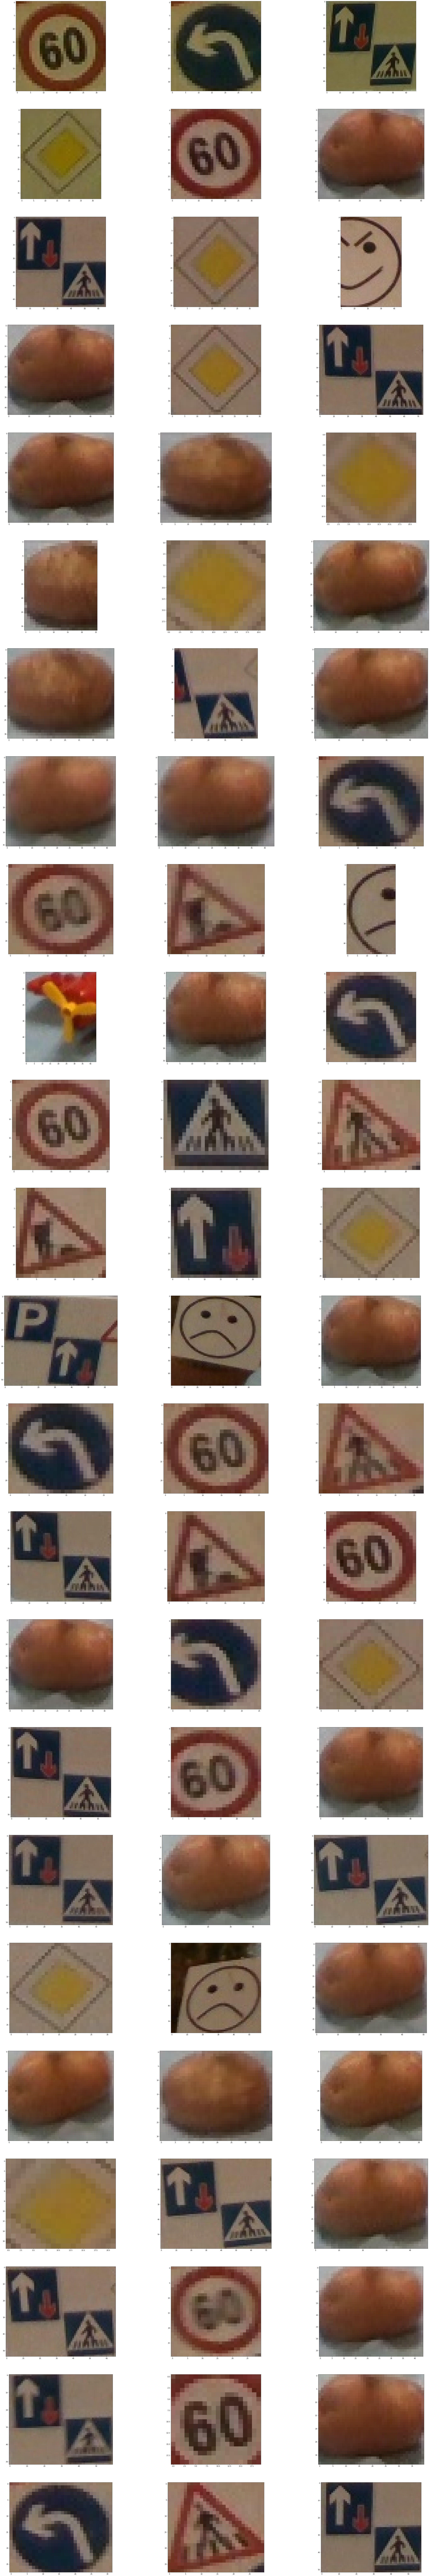

In [18]:
plt.figure(figsize=(50,300))
"""
cntr=0
for i in imgsRgb:
  plt.subplot(24,3,cntr+1)
  plt.imshow(drawBBs(myAnswers[allDestination[cntr]]["objects"], i))
  cntr+=1
  if(cntr==20):
    break
"""
cntr=0
cntr1=0
for i in imgsRgb:
  objectX=myAnswers[allDestination[cntr]]["objects"]
  for j in objectX:
    if(j[4]==0):
      print(j[0],j[1],j[2],j[3])
      imgCpy=np.copy(i)
      Cropped=imgCpy[max((j[1]-j[3]//2),0):(j[1]+j[3]//2),max((j[0]-j[2]//2),0):(j[0]+j[2]//2)]
      
      plt.subplot(24,3,cntr1+1)
      plt.imshow(Cropped)
      cntr1+=1
  cntr+=1
  if(cntr==20):
    break

# Evaluation

This snippet assumes that the contents of the downloaded zip file are in the HW folder, and that your predictions are in a dictionary called predictions that adheres to the format specified above

In [9]:
from HW.evaluate import evaluate
file = open('HW/annotations.pickle','rb')
predictions = pickle.load(file)
predictions=myAnswers
evaluate(predictions)


Task 1: 0.7694264653002516
Task 1 HC: 0.6207865168539326
Task 2: 0.0
Task 2 HC: 0.0
Task 3: 0.016949953013631808
Task 3 HC: 0.20803167116939136
Total:  1.6151946063372074
